In [2]:
print("AUTHOR: HAMZA AMIN")
print("DATE: 05/05/2025")

AUTHOR: HAMZA AMIN
DATE: 05/05/2025


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
!git clone https://github.com/jannisborn/covid19_ultrasound.git

fatal: destination path 'covid19_ultrasound' already exists and is not an empty directory.


In [6]:
meta_data = pd.read_csv(r'/kaggle/working/covid19_ultrasound/data/dataset_metadata.csv', encoding='latin1')

In [7]:
meta_data[meta_data['InThisRepo'] == 'Yes']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date added,Current location,Filename,URL (Video Name),Label,Lung Severity Score,License,LinkToLicense,ChangesMade,InThisRepo,...,Cough,Respiratory problems,Headache,Loss of smell/taste,Fatigue,Sore throat,Asymptomatic,Ground truth available in Pulse Lab Repository,Included in the PULSE Lab Dataset,Other
21,20.04.20,data/pocus_videos/Convex,Cov-Atlas+(44),http://www.thepocusatlas.com/covid19-1/m2ra6cg...,COVID-19,2.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0,1,0,0,0,0,0,0,0,NaN
22,20.04.20,data/pocus_videos/Convex,Cov-Atlas+(45),http://www.thepocusatlas.com/covid19-1/3ytz1el...,COVID-19,3.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,0,1,0,0,0,0,0,0,0,NaN
23,20.04.20,data/pocus_videos/Convex,Cov-Atlas-Day+2,http://www.thepocusatlas.com/covid19 (Day2),COVID-19,1.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,1,NaN
24,20.04.20,data/pocus_videos/Convex,Cov-Atlas-Day+4,http://www.thepocusatlas.com/covid19 (Day4),COVID-19,3.0,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN
25,20.04.20,data/pocus_videos/Convex,Pneu-Atlas-pneumonia,http://www.thepocusatlas.com/ (Classic Finding...,Bacterial pneumonia,NaN,CC BY-NC 4.0,https://creativecommons.org/licenses/by-nc/4.0/#,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,19.01.21,pocus_images/convex,Cov_Oliviera_2020_Fig15A,https://www.scielo.br/img/revistas/rb/v53n4//0...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,1,NaN
365,19.01.21,pocus_images/linear,Cov_Oliviera_2020_Fig16,https://www.scielo.br/img/revistas/rb/v53n4//0...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN
371,19.01.21,pocus_videos/convex,Cov_emdocs_vid1,http://www.emdocs.net/wp-content/uploads/2020/...,COVID-19,NaN,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,1,NaN
372,19.01.21,pocus_videos/linear,Cov_emdocs_vid2,http://www.emdocs.net/wp-content/uploads/2020/...,COVID-19,3.0,CC BY 4.0,https://creativecommons.org/licenses/by/4.0/,Cropping,Yes,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN


#### This cell processes data from a directory, counting files with specific labels (COVID-19, pneumonia, regular, and viral) across different modalities (convex and linear) and data types (videos and images), and outputs a table with the counts.

In [8]:
base_dir = "/kaggle/working/covid19_ultrasound/data/"
out_table = pd.DataFrame(index=['cov', 'pne', 'reg', 'vir'])
for modality in ["convex", "linear"]:
    for datatype in ["videos", "images"]:
        path = os.path.join(base_dir, "pocus_" + datatype, modality)
        file_list = filter(
            lambda x: (
                x[0] != "." and os.path.isfile(os.path.join(path, x)) and
                not "_Butterfly" in x
            ), os.listdir(path)
        )
        label_list = [f[:3].lower() for f in file_list]
        counts = [
            label_list.count(lab) for lab in ['cov', 'pne', 'reg', 'vir']
        ]
        out_table[modality + "_" + datatype] = counts
print("Data without Butterfly:")
print(out_table)

Data without Butterfly:
     convex_videos  convex_images  linear_videos  linear_images
cov             30              5              3              3
pne             36             14              1              0
reg             56             10              3              0
vir              2              0              3              0


In [9]:
meta_data[:2]

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Date added,Current location,Filename,URL (Video Name),Label,Lung Severity Score,License,LinkToLicense,ChangesMade,InThisRepo,...,Cough,Respiratory problems,Headache,Loss of smell/taste,Fatigue,Sore throat,Asymptomatic,Ground truth available in Pulse Lab Repository,Included in the PULSE Lab Dataset,Other
0,20.04.20,butterfly,Cov-Butterfly-COVID Lung 2,https://www.butterflynetwork.com/covid-19#lung...,COVID-19,NaN,NaN,N.A.,"Cropping, Artifact removal, frame subselection",No,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN
1,20.04.20,butterfly,Cov-Butterfly-Skip Lesion,https://www.butterflynetwork.com/covid19/covid...,COVID-19,NaN,NaN,N.A.,"Cropping, Artifact removal, frame subselection",No,...,n/A,n/A,n/A,n/A,n/A,n/A,n/A,0,0,NaN


In [10]:
# encoding Label feature as 1 or 2

def label_enc(idx):
    if idx == 'COVID-19':
        return 2
    elif idx == 'Bacterial pneumonia':
        return 1
    elif idx == 'Viral pneumonia':
        return 1
    else:
        return 0


meta_data['Label'] = meta_data['Label'].apply(label_enc)

In [11]:
meta_data['Label']

0      2
1      2
2      2
3      0
4      0
      ..
369    2
370    2
371    2
372    2
373    2
Name: Label, Length: 374, dtype: int64

In [12]:
## in this code we are just creating Df from table meta_data

possible_endings = [
       ".mp4", ".mpeg", ".avi", ".gif",
    ".mov"
]
base = '/kaggle/working/covid19_ultrasound/data'
table = meta_data
#table = table[table['InThisRepo'] == 'Yes']
real_paths = []
labels = []
in_this_repos = []
for i in range(len(table)):
    fn = table.iloc[i]["Filename"]
    location = table.iloc[i]["Current location"].lower()
    if pd.isnull(location) or 'data_with_artifacts' in location:
        continue
    if location.startswith("data/"):
        location = location[5:]

    path1 = os.path.join(base, location, fn)
    path2 = ".".join(path1.split(".")[:-1]) + ".mp4"
    for ending in possible_endings:
        if os.path.exists(path1 + ending):
            table = table.copy()
            real_path = path1+ending
            label = table['Label'].iloc[i]
            in_this_repo = table['InThisRepo'].iloc[i]
            
            real_paths.append(real_path)
            labels.append(label)
            in_this_repos.append(in_this_repo)

preprocessed_metadata = pd.DataFrame({'path':real_paths,'label':labels,'in_this_repo':in_this_repos})

In [13]:
vid_path = preprocessed_metadata['path'].iloc[0]

vid_path

'/kaggle/working/covid19_ultrasound/data/pocus_videos/convex/Cov-Atlas+(44).gif'

In [14]:
# captures single frame from video
vidcap = cv2.VideoCapture(vid_path)
success,image = vidcap.read()

In [15]:
preprocessed_metadata

,path,label,in_this_repo
0,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
1,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
2,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
3,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
4,/kaggle/working/covid19_ultrasound/data/pocus_...,1,Yes
...,...,...,...
127,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
128,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
129,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes
130,/kaggle/working/covid19_ultrasound/data/pocus_...,2,Yes


In [16]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


This code is used to extract frames from videos and save them as JPEG images. It also creates a metadata DataFrame with the paths to the extracted frames, their corresponding labels, and video IDs.

In [20]:
%%capture
max_videos = 300  # reduce number of videos
max_frames = 10  # reduce number of frames per video

paths = []
labels = []
video_ids = []

for i in tqdm(range(min(max_videos, len(preprocessed_metadata)))):
    vidcap = cv2.VideoCapture(preprocessed_metadata['path'].iloc[i])
    success, image = vidcap.read()
    count = 0
    while success and count < max_frames:
        path = f"./data/Video_{i}_frame_{count}.jpg"
        video_id = f'Video_{i}'
        cv2.imwrite(path, image)
        success, image = vidcap.read()
        count += 1
        paths.append(path)
        video_ids.append(video_id)
        labels.append(preprocessed_metadata['label'].iloc[i])


[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid
[swscaler @ 0x349ce8c0] Slice parameters 0, 141 are invalid


In [21]:
metadata_final = pd.DataFrame({'path':paths,'label':labels,'video_id':video_ids})
metadata_final

,path,label,video_id
0,./data/Video_0_frame_0.jpg,2,Video_0
1,./data/Video_0_frame_1.jpg,2,Video_0
2,./data/Video_0_frame_2.jpg,2,Video_0
3,./data/Video_0_frame_3.jpg,2,Video_0
4,./data/Video_0_frame_4.jpg,2,Video_0
...,...,...,...
1315,./data/Video_131_frame_5.jpg,2,Video_131
1316,./data/Video_131_frame_6.jpg,2,Video_131
1317,./data/Video_131_frame_7.jpg,2,Video_131
1318,./data/Video_131_frame_8.jpg,2,Video_131


In [22]:
metadata_final.to_csv('covid_data.csv',index=False)

In [23]:
metadata_final['label'].value_counts()

label
0    560
1    430
2    330
Name: count, dtype: int64

In [24]:
metadata_final['path'] = metadata_final['path'].apply(lambda x: os.path.abspath(x))

In [25]:
missing = [p for p in metadata_final['path'] if not os.path.exists(p)]
print(f"Missing {len(missing)} files")  # Should be 0

Missing 0 files


In [26]:
%%capture
!pip install timm

In [27]:
print("MODELING STARTS HERE")

MODELING STARTS HERE


In [28]:
df = metadata_final

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import torch
from torch.utils.data import Dataset,DataLoader
import torch.nn as nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedGroupKFold
import timm
from tqdm import tqdm
import albumentations as A
from collections import defaultdict
from albumentations.pytorch import ToTensorV2
from sklearn.metrics import roc_auc_score,f1_score
from torch.cuda import amp
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import gc
import copy

/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.6' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [55]:
class CFG:
    seed          = 42
    debug         = False # set debug=False for Full Training
    model         =  'vit_tiny_patch16_224'
    batch_size    = 16
    img_size      = [224, 224]
    epochs        = 5
    lr            = 1e-2
    scheduler     = 'CosineAnnealingLR'
    min_lr        = 1e-6
    T_max         = int(30000/batch_size*epochs)+50
    T_0           = 25
    warmup_epochs = 0
    wd            = 1e-6  #weight decay
    n_accumulate  = 1 
    n_fold        = 5
    folds         = [0]
    device        = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [29]:
# df = pd.read_csv('/kaggle/working/covid_data.csv')

# def correct_path(idx):
#     path = '/kaggle/working/covid19_ultrasound/data'+idx[6::]
#     return path

# df['path'] = df['path'].apply(correct_path)

In [31]:
df

,path,label,video_id
0,/kaggle/working/data/Video_0_frame_0.jpg,2,Video_0
1,/kaggle/working/data/Video_0_frame_1.jpg,2,Video_0
2,/kaggle/working/data/Video_0_frame_2.jpg,2,Video_0
3,/kaggle/working/data/Video_0_frame_3.jpg,2,Video_0
4,/kaggle/working/data/Video_0_frame_4.jpg,2,Video_0
...,...,...,...
1315,/kaggle/working/data/Video_131_frame_5.jpg,2,Video_131
1316,/kaggle/working/data/Video_131_frame_6.jpg,2,Video_131
1317,/kaggle/working/data/Video_131_frame_7.jpg,2,Video_131
1318,/kaggle/working/data/Video_131_frame_8.jpg,2,Video_131


In [32]:
# splitting data into 5 folds
df['fold'] = -1
skf = StratifiedGroupKFold(n_splits=5,shuffle=True,random_state=42)
for fold,(train_idx,test_idx) in enumerate(skf.split(df['path'],df['label'],groups=df['video_id'])):
    df.loc[test_idx,'fold'] = fold

In [33]:
df

,path,label,video_id,fold
0,/kaggle/working/data/Video_0_frame_0.jpg,2,Video_0,0
1,/kaggle/working/data/Video_0_frame_1.jpg,2,Video_0,0
2,/kaggle/working/data/Video_0_frame_2.jpg,2,Video_0,0
3,/kaggle/working/data/Video_0_frame_3.jpg,2,Video_0,0
4,/kaggle/working/data/Video_0_frame_4.jpg,2,Video_0,0
...,...,...,...,...
1315,/kaggle/working/data/Video_131_frame_5.jpg,2,Video_131,3
1316,/kaggle/working/data/Video_131_frame_6.jpg,2,Video_131,3
1317,/kaggle/working/data/Video_131_frame_7.jpg,2,Video_131,3
1318,/kaggle/working/data/Video_131_frame_8.jpg,2,Video_131,3


In [34]:
import os

# Check the real dataset location
for root, dirs, files in os.walk("/kaggle/input"):
    for file in files[:10]:  # show only first 10 files
        print(os.path.join(root, file))
    break
import os

missing = [p for p in df['path'] if not os.path.exists(p)]
print(f"Missing {len(missing)} files")


Missing 0 files


In [35]:
#loading the imgs from dataset we created earlier
class CovidDataset(Dataset):    
    def __init__(self, df, transforms=None, is_valid=False):
        self.df = df
        self.transforms = transforms
        self.is_valid = is_valid

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img = cv2.imread(self.df['path'].iloc[idx])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        label = self.df['label'].iloc[idx]
        
        if self.transforms:
            img = self.transforms(image=img)['image']
            
        label = torch.tensor(label, dtype=torch.long)
        
        if self.is_valid:
            return img, label, self.df['video_id'].iloc[idx]
        return img, label

In [36]:
import albumentations as A #img augumentation lib

# transformation pipeline func
def get_transforms(data):
    
    if data == 'train':
        return A.Compose([
            A.Resize(*CFG.img_size,interpolation=cv2.INTER_NEAREST),
            ToTensorV2(),
        ],p=1.0)

    elif data == 'valid':
        return A.Compose([
            A.Resize(*CFG.img_size,interpolation=cv2.INTER_NEAREST),
            ToTensorV2(),
        ],p=1.0)

In [37]:
class BaseModel(nn.Module):
    def __init__(self,cfg,pretrained=False):
        super().__init__()
        self.cfg = cfg
        self.model = timm.create_model(cfg.model,pretrained=pretrained)
        self.model.head = nn.Linear(self.model.head.in_features,1)
        
    def forward(self,x):
        output = self.model(x)
        return output

In [38]:
criterion = nn.BCEWithLogitsLoss()
def train_one_epoch(model, optimizer, scheduler, dataloader, device, epoch):
    model.train()
    scaler = torch.amp.GradScaler()
    
    dataset_size = 0
    running_loss = 0.0
    epoch_loss = 0
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Train ')
    for step, (images, labels) in pbar:         
        images = images.to(device, dtype=torch.float)
        labels  = labels.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        with amp.autocast(enabled=True):
            y_pred = model(images)
            loss   = criterion(y_pred.view(-1), labels)
            loss   = loss / CFG.n_accumulate
            
        scaler.scale(loss).backward()
    
        if (step + 1) % CFG.n_accumulate == 0:
            scaler.step(optimizer)
            scaler.update()
            # zero the parameter gradients
            optimizer.zero_grad()
            if scheduler is not None:
                scheduler.step()
                
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        #print(epoch_loss)
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(train_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_mem=f'{mem:0.2f} GB')
        torch.cuda.empty_cache()
        gc.collect()
    
    return epoch_loss

In [48]:
criterion = nn.BCEWithLogitsLoss()

@torch.no_grad()
def valid_one_epoch(model, dataloader, device, epoch, df, fold, optimizer):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    val_scores = []
    video_ids_list = list(df[df['fold'] == fold]['video_id'].unique())
    video_ids_score = {}
    video_ids_count = {}
    for i in video_ids_list:
        video_ids_score[i] = 0
        
    for i in video_ids_list:
        df_1 = df[df['fold'] == fold].copy()
        video_ids_count[i] = len(df_1[df['video_id']==i])
        
    pbar = tqdm(enumerate(dataloader), total=len(dataloader), desc='Valid ')
    for step, (images, labels, video_ids) in pbar:        
        images  = images.to(device, dtype=torch.float)
        labels   = labels.to(device, dtype=torch.float)
        
        batch_size = images.size(0)
        
        y_pred  = model(images)
        loss    = criterion(y_pred.view(-1), labels)
       
            
        running_loss += (loss.item() * batch_size)
        dataset_size += batch_size
        
        epoch_loss = running_loss / dataset_size
        
        y_pred = nn.Sigmoid()(y_pred)
        
        for i in range(len(video_ids)):
            video_ids_score[video_ids[i]] += y_pred[i].cpu().detach().numpy()
            
        #val_dice = dice_coef(masks, y_pred).cpu().detach().numpy()
        #val_jaccard = iou_coef(masks, y_pred).cpu().detach().numpy()
        #val_scores.append([val_dice, val_jaccard])
        
        mem = torch.cuda.memory_reserved() / 1E9 if torch.cuda.is_available() else 0
        current_lr = optimizer.param_groups[0]['lr']
        pbar.set_postfix(valid_loss=f'{epoch_loss:0.4f}',
                        lr=f'{current_lr:0.5f}',
                        gpu_memory=f'{mem:0.2f} GB')
    scores = []
    labels = []
    for ids in video_ids_score:
        video_ids_score[ids] = video_ids_score[ids]/video_ids_count[ids]
        
    for ids in video_ids_score:
        labels.append(df[df['video_id']==ids]['label'].iloc[0])
        scores.append(float(video_ids_score[ids]))
    scores = np.array(scores)
    scores = scores > 0.5
    scores = list(scores)
    val_scores = f1_score(labels, scores, average='macro')
    torch.cuda.empty_cache()
    gc.collect()
    
    return epoch_loss, val_scores

In [49]:
def run_training(model, optimizer, scheduler, device, num_epochs,df,fold, train_loader, valid_loader):
    
    if torch.cuda.is_available():
        print("cuda: {}\n".format(torch.cuda.get_device_name()))
    
    start = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_score      = -np.inf
    best_epoch     = -1
    history = defaultdict(list)
    
    for epoch in range(1, num_epochs + 1): 
        gc.collect()
        print(f'Epoch {epoch}/{num_epochs}', end='')
        train_loss = train_one_epoch(model, optimizer, scheduler, 
                                           dataloader=train_loader,
                                     device=CFG.device, epoch=epoch)
        val_loss, val_scores = valid_one_epoch(model, valid_loader, 
                                                 device=CFG.device, 
                                                 epoch=epoch,df=df,fold=fold, optimizer=optimizer)
    
        history['Train Loss'].append(train_loss)
        history['Valid Loss'].append(val_loss)
        history['Valid Score'].append(val_scores)
        
        
        
        print(f'Valid Score: {val_scores:0.4f}')
        
        # deep copy the model
        if val_scores >= best_score:
            print(f"Valid Score Improved ({best_score:0.4f} ---> {val_scores:0.4f})")
            best_score    = val_scores
            best_epoch   = epoch
            best_model_wts = copy.deepcopy(model.state_dict())
            PATH = f"best_epoch-{fold:02d}.bin"
            torch.save(model.state_dict(), PATH)
            # Save a model file from the current directory
            print(f"Model Saved")
            
        last_model_wts = copy.deepcopy(model.state_dict())
        PATH = f"last_epoch-{fold:02d}.bin"
        torch.save(model.state_dict(), PATH)
            
        print(); print()
    
    end = time.time()
    time_elapsed = end - start
    print('Training complete in {:.0f}h {:.0f}m {:.0f}s'.format(
        time_elapsed // 3600, (time_elapsed % 3600) // 60, (time_elapsed % 3600) % 60))
    print("Best Score: {:.4f}".format(best_score))
    
    # load best model weights
    model.load_state_dict(best_model_wts)
    
    return model, history

In [50]:
def fetch_scheduler(optimizer):
    if CFG.scheduler == 'CosineAnnealingLR':
        scheduler = lr_scheduler.CosineAnnealingLR(optimizer,T_max=CFG.T_max, 
                                                   eta_min=CFG.min_lr)
    elif CFG.scheduler == 'CosineAnnealingWarmRestarts':
        scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=CFG.T_0, 
                                                             eta_min=CFG.min_lr)
    elif CFG.scheduler == 'ReduceLROnPlateau':
        scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,
                                                   mode='min',
                                                   factor=0.1,
                                                   patience=7,
                                                   threshold=0.0001,
                                                   min_lr=CFG.min_lr,)
    elif CFG.scheduer == 'ExponentialLR':
        scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.85)
    elif CFG.scheduler == None:
        return None
        
    return scheduler

In [51]:
criterion = nn.BCEWithLogitsLoss()

In [56]:
for fold in CFG.folds:
    print(f'#'*15)
    print(f'### Fold: {fold}')
    print(f'#'*15)
    train_df = df[df['fold'] !=fold].reset_index(drop=True)
    valid_df = df[df['fold'] ==fold].reset_index(drop=True)
    
    if CFG.debug:
        train_df = train_df.head()
        valid_df = valid_df.head()
    
    train_dataset = CovidDataset(train_df,transforms=get_transforms(data='train'),is_valid=False)
    valid_dataset = CovidDataset(valid_df,transforms=get_transforms(data='valid'),is_valid=True)
    
    train_loader = DataLoader(train_dataset,batch_size=CFG.batch_size,shuffle=True,num_workers=2,drop_last=True)
    valid_loader = DataLoader(valid_dataset,batch_size=CFG.batch_size,shuffle=False,num_workers=2,drop_last=False)
    
    cfg = CFG()
    
    model     = BaseModel(cfg,pretrained=True)
    model.to(CFG.device)
    optimizer = optim.Adam(model.parameters(), lr=CFG.lr, weight_decay=CFG.wd)
    scheduler = fetch_scheduler(optimizer)
    model, history = run_training(model, optimizer, scheduler,
                                  device=CFG.device,
                                  num_epochs=CFG.epochs,
                                 df=df,
                                 fold=fold,
                                 train_loader=train_loader,
                                 valid_loader=valid_loader)

print("hi tom training done")

###############
### Fold: 0
###############
cuda: Tesla T4

Epoch 1/5

Train :   0%|          | 0/65 [00:00<?, ?it/s]/tmp/ipykernel_575/3566573580.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=True):
/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
Train : 100%|██████████| 65/65 [00:18<00:00,  3.60it/s, gpu_mem=0.79 GB, lr=0.01000, train_loss=0.2175]
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipyke

Valid Score: 0.3067
Valid Score Improved (-inf ---> 0.3067)
Model Saved


Epoch 2/5

Train :   0%|          | 0/65 [00:00<?, ?it/s]/tmp/ipykernel_575/3566573580.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=True):
Train : 100%|██████████| 65/65 [00:18<00:00,  3.59it/s, gpu_mem=0.81 GB, lr=0.01000, train_loss=-28.3183]
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id'

Valid Score: 0.2963


Epoch 3/5

Train :   0%|          | 0/65 [00:00<?, ?it/s]/tmp/ipykernel_575/3566573580.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=True):
Train : 100%|██████████| 65/65 [00:18<00:00,  3.58it/s, gpu_mem=0.81 GB, lr=0.00999, train_loss=-97.2995]
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id'

Valid Score: 0.2963


Epoch 4/5

Train :   0%|          | 0/65 [00:00<?, ?it/s]/tmp/ipykernel_575/3566573580.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=True):
Train : 100%|██████████| 65/65 [00:18<00:00,  3.60it/s, gpu_mem=0.81 GB, lr=0.00998, train_loss=-132.1480]
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id

Valid Score: 0.1373


Epoch 5/5

Train :   0%|          | 0/65 [00:00<?, ?it/s]/tmp/ipykernel_575/3566573580.py:16: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(enabled=True):
Train : 100%|██████████| 65/65 [00:18<00:00,  3.60it/s, gpu_mem=0.81 GB, lr=0.00997, train_loss=-211.4270]
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id']==i])
/tmp/ipykernel_575/2152262876.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  video_ids_count[i] = len(df_1[df['video_id

Valid Score: 0.1373


Training complete in 0h 1m 37s
Best Score: 0.3067
hi tom training done


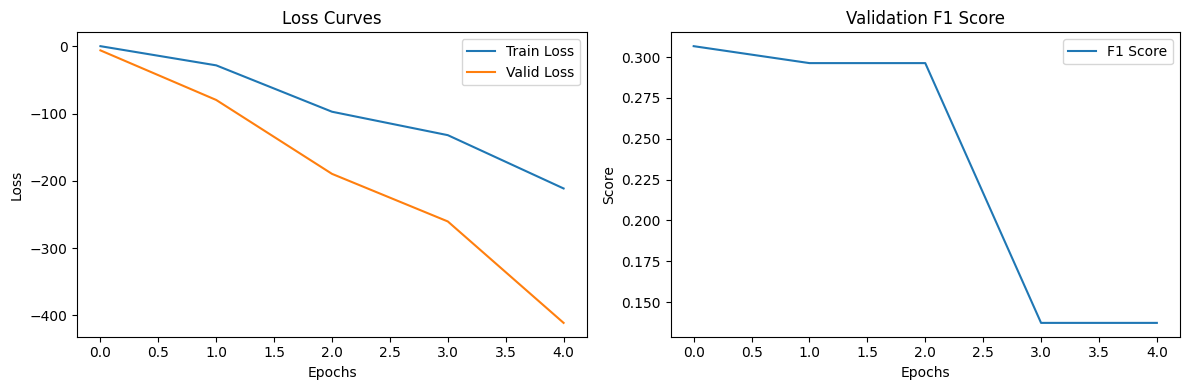

In [57]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['Train Loss'], label='Train Loss')
plt.plot(history['Valid Loss'], label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['Valid Score'], label='F1 Score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Validation F1 Score')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
# Load best model for inference
best_model = BaseModel(CFG(), pretrained=False)
best_model.load_state_dict(torch.load(f"best_epoch-{fold:02d}.bin"))
best_model.to(CFG.device)
best_model.eval()

/tmp/ipykernel_575/2509371234.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(f"best_epoch-{fold:02d}.bin"))


BaseModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 192, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=192, out_features=576, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=192, out_features=192, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((192,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=192, out_features=768, bias=True)
          (act): GELU(approximate='none')
    

In [64]:
# Fixed function to predict on a single image
def predict_single_image(image_path, model):
    # Read and process image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Apply transforms
    transforms = get_transforms(data='valid')
    img = transforms(image=img)['image']
    
    # Ensure the image is float tensor
    img = img.float()  # This line ensures the tensor is of type float
    
    # Create batch dimension
    img = img.unsqueeze(0).to(CFG.device)
    
    # Predict
    with torch.no_grad():
        pred = model(img)
        pred = torch.sigmoid(pred)
    
    return pred.cpu().numpy()[0][0]

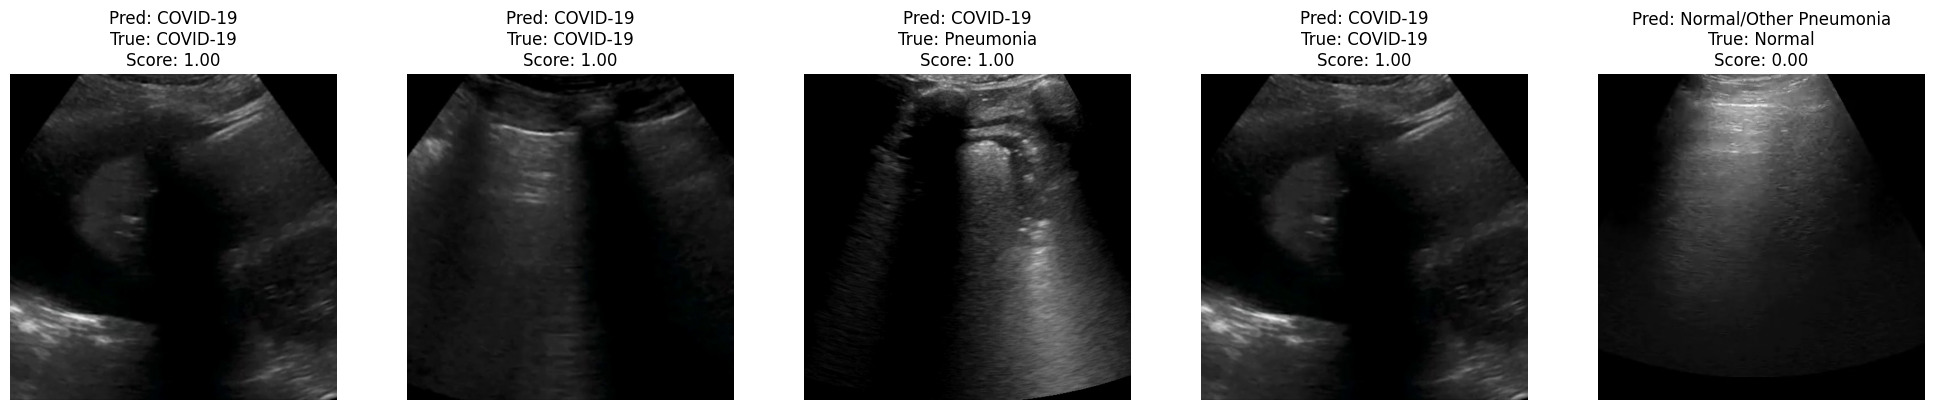

In [65]:
# Function to visualize sample predictions
def visualize_predictions(model, df, num_samples=5):
    # Get some sample images from validation set
    val_df = df[df['fold'] == fold].reset_index(drop=True)
    samples = val_df.sample(num_samples)
    
    plt.figure(figsize=(20, 4))
    for i, (idx, row) in enumerate(samples.iterrows()):
        # Read image
        img_path = row['path']
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # Get prediction
        pred_score = predict_single_image(img_path, model)
        pred_class = "COVID-19" if pred_score > 0.5 else "Normal/Other Pneumonia"
        
        # Get ground truth
        true_label = row['label']
        true_class = "COVID-19" if true_label == 2 else ("Pneumonia" if true_label == 1 else "Normal")
        
        # Plot
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}\nScore: {pred_score:.2f}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function
visualize_predictions(best_model, df)

Evaluating: 100%|██████████| 17/17 [00:00<00:00, 23.61it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.22      0.57      0.32         7
           2       0.00      0.00      0.00         9

    accuracy                           0.37        27
   macro avg       0.30      0.37      0.31        27
weighted avg       0.33      0.37      0.33        27


Confusion Matrix:
[[6 5 0]
 [3 4 0]
 [0 9 0]]


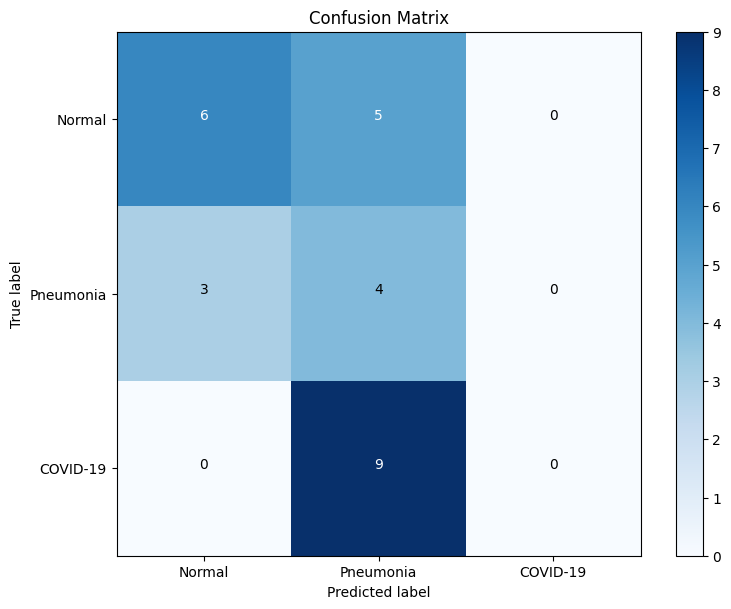

In [61]:
# Function to evaluate model performance on validation set
@torch.no_grad()
def evaluate_model(model, df, fold):
    model.eval()
    
    # Get validation data
    val_df = df[df['fold'] == fold].reset_index(drop=True)
    
    # Get unique video ids
    video_ids = list(val_df['video_id'].unique())
    
    # Initialize dictionaries to store scores
    video_scores = {}
    video_frames = {}
    
    # Initialize lists for true labels and predictions
    true_labels = []
    pred_labels = []
    
    # Create validation dataset and dataloader
    valid_dataset = CovidDataset(val_df, transforms=get_transforms(data='valid'), is_valid=True)
    valid_loader = DataLoader(valid_dataset, batch_size=CFG.batch_size, shuffle=False, num_workers=2)
    
    # Get predictions for all frames
    for _, (images, labels, ids) in enumerate(tqdm(valid_loader, desc='Evaluating')):
        images = images.to(CFG.device, dtype=torch.float)
        
        preds = model(images)
        preds = torch.sigmoid(preds).cpu().numpy().flatten()
        
        # Store predictions by video ID
        for i, vid_id in enumerate(ids):
            if vid_id not in video_scores:
                video_scores[vid_id] = []
                video_frames[vid_id] = labels[i].item()
            
            video_scores[vid_id].append(preds[i])
    
    # Average predictions by video
    for vid_id in video_scores:
        avg_score = np.mean(video_scores[vid_id])
        pred_label = 1 if avg_score > 0.5 else 0
        
        true_labels.append(video_frames[vid_id])
        pred_labels.append(pred_label)
    
    # Calculate metrics
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    
    true_labels = np.array(true_labels)
    pred_labels = np.array(pred_labels)
    
    print("Classification Report:")
    print(classification_report(true_labels, pred_labels))
    
    print("\nConfusion Matrix:")
    conf_mat = confusion_matrix(true_labels, pred_labels)
    print(conf_mat)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(conf_mat, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    
    classes = ['Normal', 'Pneumonia', 'COVID-19']
    tick_marks = np.arange(len(np.unique(true_labels)))
    plt.xticks(tick_marks, [classes[i] for i in np.unique(true_labels)])
    plt.yticks(tick_marks, [classes[i] for i in np.unique(true_labels)])
    
    thresh = conf_mat.max() / 2.
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, format(conf_mat[i, j], 'd'),
                    horizontalalignment="center",
                    color="white" if conf_mat[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Run evaluation
evaluate_model(best_model, df, fold)

Processing validation data: 100%|██████████| 270/270 [00:02<00:00, 114.86it/s]


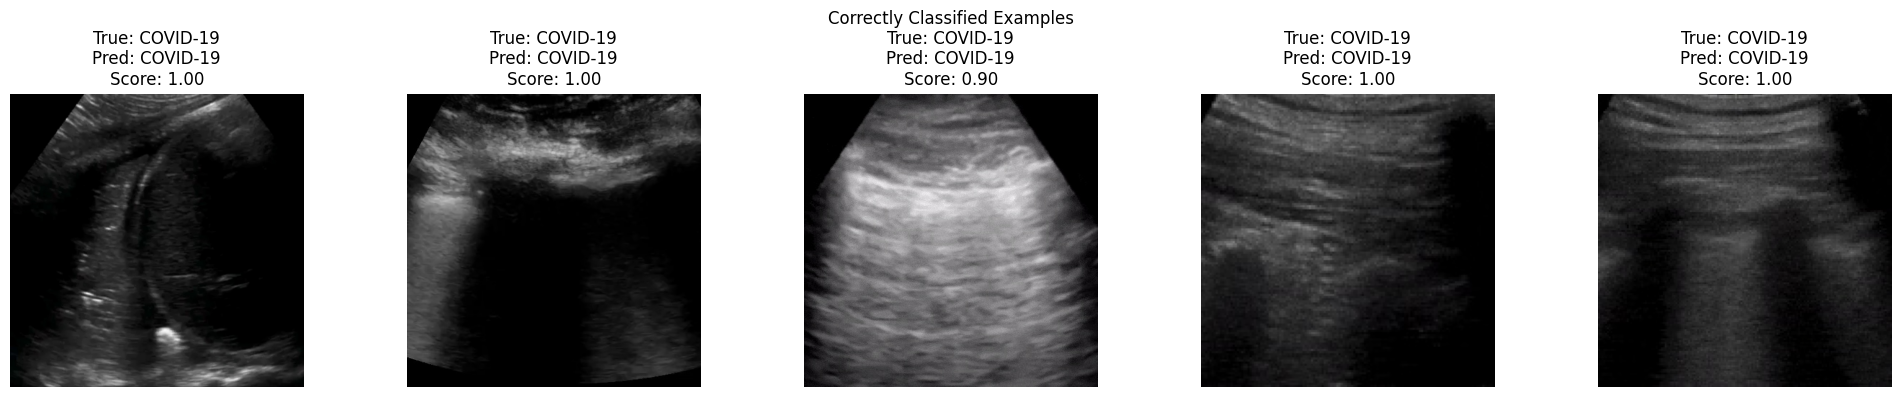

Processing validation data: 100%|██████████| 270/270 [00:02<00:00, 118.53it/s]


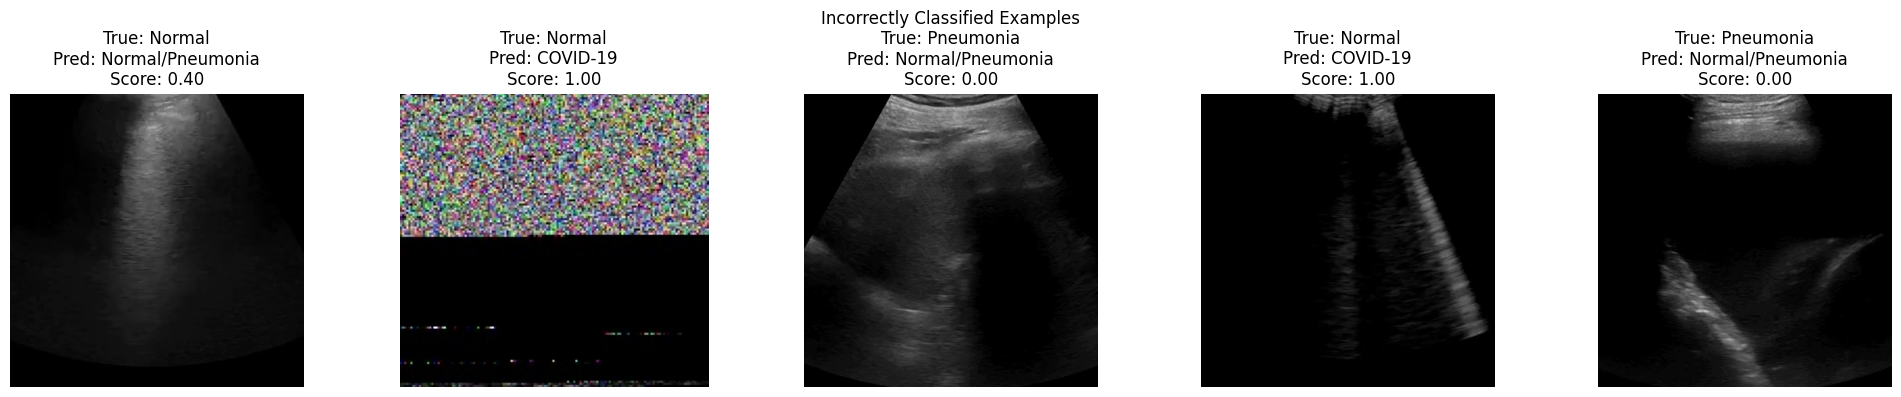

In [68]:
# Display some correctly and incorrectly classified examples
def show_classification_examples(model, df, fold, correct=True, num_samples=5):
    model.eval()
    
    # Get validation data
    val_df = df[df['fold'] == fold].reset_index(drop=True)
    
    # Dict to store predictions by video ID
    video_preds = {}
    
    # Process all validation images
    for i in tqdm(range(len(val_df)), desc="Processing validation data"):
        img_path = val_df['path'].iloc[i]
        vid_id = val_df['video_id'].iloc[i]
        true_label = val_df['label'].iloc[i]
        
        if vid_id not in video_preds:
            video_preds[vid_id] = {'paths': [], 'true': true_label, 'preds': []}
        
        prob = predict_single_image(img_path, model)
        video_preds[vid_id]['paths'].append(img_path)
        video_preds[vid_id]['preds'].append(prob)
    
    # Calculate average prediction for each video
    results = []
    for vid_id, data in video_preds.items():
        avg_pred = np.mean(data['preds'])
        pred_label = 2 if avg_pred > 0.5 else (1 if 0.3 <= avg_pred <= 0.5 else 0)  # Simple threshold-based classification
        is_correct = (pred_label == data['true'])
        
        if is_correct == correct:  # Show only correct or incorrect based on parameter
            results.append({
                'video_id': vid_id,
                'true_label': data['true'],
                'pred_score': avg_pred,
                'img_path': data['paths'][0]  # Just use the first frame for display
            })
    
    # Select random samples
    if len(results) > num_samples:
        samples = random.sample(results, num_samples)
    else:
        samples = results
    
    # Display images
    plt.figure(figsize=(20, 4))
    for i, sample in enumerate(samples):
        img = cv2.imread(sample['img_path'])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        true_class = "COVID-19" if sample['true_label'] == 2 else ("Pneumonia" if sample['true_label'] == 1 else "Normal")
        pred_class = "COVID-19" if sample['pred_score'] > 0.5 else "Normal/Pneumonia"
        
        plt.subplot(1, len(samples), i+1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {pred_class}\nScore: {sample['pred_score']:.2f}")
        plt.axis('off')
    
    status = "Correctly" if correct else "Incorrectly"
    plt.suptitle(f"{status} Classified Examples")
    plt.tight_layout()
    plt.show()

# Import random for sampling
import random

# Show correctly classified examples
show_classification_examples(best_model, df, fold, correct=True)

# Show incorrectly classified examples
show_classification_examples(best_model, df, fold, correct=False)